# FashionMNIST Data Property Collection

In [1]:
import torch
from torchvision import datasets, transforms
import os

In [2]:
data_dir = os.path.dirname(os.path.abspath('')) + '\data'
batch_size_train = 32
batch_size_test = 64
print('Using data dir:', data_dir)

Using data dir: D:\Workspace\git\active\VisionNETs\data


In [3]:
tfs = transforms.Compose([transforms.ToTensor()])

train_data = datasets.FashionMNIST(data_dir,
                            train=True,
                            download=True,
                            transform=tfs
                            )

test_data = datasets.FashionMNIST(data_dir,
                           train=False,
                           download=True,
                           transform=tfs
                           )

train_loader = torch.utils.data.DataLoader(train_data,
                                           batch_size=batch_size_train, 
                                           shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data,
                                          batch_size=batch_size_test, 
                                          shuffle=True)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 26421880/26421880 [00:09<00:00, 2867689.30it/s]


Extracting D:\Workspace\git\active\VisionNETs\data\FashionMNIST\raw\train-images-idx3-ubyte.gz to D:\Workspace\git\active\VisionNETs\data\FashionMNIST\raw



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 29515/29515 [00:00<00:00, 336064.90it/s]


Extracting D:\Workspace\git\active\VisionNETs\data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to D:\Workspace\git\active\VisionNETs\data\FashionMNIST\raw



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4422102/4422102 [00:01<00:00, 2562667.98it/s]


Extracting D:\Workspace\git\active\VisionNETs\data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to D:\Workspace\git\active\VisionNETs\data\FashionMNIST\raw



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5148/5148 [00:00<00:00, 5148373.15it/s]

Extracting D:\Workspace\git\active\VisionNETs\data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to D:\Workspace\git\active\VisionNETs\data\FashionMNIST\raw



## Example of dataset image

Label: tensor(7)
Shape: torch.Size([28, 28, 1])


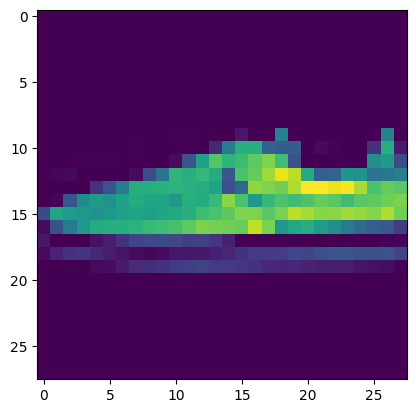

In [7]:
import matplotlib.pyplot as plt
example_data, labels = next(iter(test_loader))
sample = example_data[0].permute(1, 2, 0)
# show the data
plt.imshow(sample, interpolation='nearest')
print("Label:", str(labels[0]))
print("Shape:", sample.shape)

## Mean and Variance
https://gist.github.com/JorritWillaert/2cae1da8cd42226a184f0268c0cb58f8#file-get_mean_and_std-py

In [8]:
channels_sum, channels_squared_sum, num_batches = 0, 0, 0
for data, _ in train_loader:
    # Mean over batch, height and width, but not over the channels
    channels_sum += torch.mean(data, dim=[0,2,3])
    channels_squared_sum += torch.mean(data**2, dim=[0,2,3])
    num_batches += 1

mean = channels_sum / num_batches

# std = sqrt(E[X^2] - (E[X])^2)
std = (channels_squared_sum / num_batches - mean ** 2) ** 0.5
print("Mean:", mean)
print("Std:", std)

Mean: tensor([0.2860])
Std: tensor([0.3530])


## Shape
For the MLP model, we flatten the image

In [9]:
data, _ = next(iter(test_loader))
MLP_shape = data.view(*data.shape[:1], -1)
print(data.shape)
print(MLP_shape.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64, 784])
